In [1]:
!ls
!gpustat

exp__data_size_train_test_errors_36.npy		    plot.ipynb
new_larger_para_data_size_train_test_errors_36.npy  workshop_36.pdf
blade.seas.upenn.edu  Tue Oct 19 10:56:03 2021  455.45.01
[0] RTX A6000        | 30'C,   0 % |     1 / 48685 MB |
[1] RTX A6000        | 28'C,   0 % |     1 / 48685 MB |
[2] RTX A6000        | 34'C,   0 % | 45188 / 48685 MB | shyamss(45185M)
[3] RTX A6000        | 29'C,   0 % |     1 / 48685 MB |
[4] RTX A6000        | 36'C,   0 % |     1 / 48685 MB |
[5] RTX A6000        | 34'C,   0 % | 44506 / 48685 MB | sifanw(44503M)
[6] RTX A6000        | 85'C, 100 % | 44688 / 48685 MB | sifanw(44685M)
[7] RTX A6000        | 86'C,  93 % | 44914 / 48685 MB | wangh19(44911M)


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
train_errors_1, test_errors_1 = np.load(f'exp__data_size_train_test_errors_36.npy')
train_errors_2, test_errors_2 = np.load(f'new_larger_para_data_size_train_test_errors_36.npy')

In [4]:
xavier_train_errors = np.concatenate((train_errors_1[:, :8], train_errors_2[:, :12]), axis = 1)
scaled_train_errors = np.concatenate((train_errors_1[:, 8:], train_errors_2[:, 12:]), axis = 1)
xavier_test_errors = np.concatenate((test_errors_1[:, :8], test_errors_2[:, :12]), axis = 1)
scaled_test_errors = np.concatenate((test_errors_1[:, 8:], test_errors_2[:, 12:]), axis = 1)

train_errors = np.concatenate((xavier_train_errors, scaled_train_errors), axis = 1)
test_errors = np.concatenate((xavier_test_errors, scaled_test_errors), axis = 1)

In [5]:
init_size = train_errors.shape[1] // 2
sizes = 2 ** np.arange(12, 25).astype(int)[:train_errors.shape[0]]

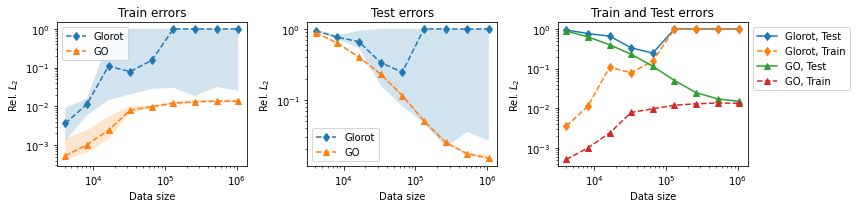

In [6]:
plt.figure(figsize = (12,3))
plt.subplot(1,3,1)
plt.plot(sizes, np.median(train_errors[:,:init_size], axis = 1), marker = 'd', linestyle = '--', label = 'Glorot')
plt.fill_between(sizes, *np.quantile(train_errors[:,:init_size], np.array([0.1, 0.9]), axis = 1), alpha = 0.2)
plt.plot(sizes, np.median(train_errors[:,init_size:], axis = 1), marker = '^', linestyle = '--', label = 'GO')
plt.fill_between(sizes, *np.quantile(train_errors[:,init_size:], np.array([0.1, 0.9]), axis = 1), alpha = 0.2)
plt.xlabel('Data size')
plt.ylabel(r'Rel. $L_2$')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Train errors')
# plt.ylim([5e-3, 1])
plt.tight_layout()
plt.subplot(1,3,2)
plt.plot(sizes, np.median(test_errors[:,:init_size], axis = 1), marker = 'd', linestyle = '--', label = 'Glorot')
plt.fill_between(sizes, *np.quantile(test_errors[:,:init_size], np.array([0.1, 0.9]), axis = 1), alpha = 0.2)
plt.plot(sizes, np.median(test_errors[:,init_size:], axis = 1), marker = '^', linestyle = '--', label = 'GO')
plt.fill_between(sizes, *np.quantile(test_errors[:,init_size:], np.array([0.1, 0.9]), axis = 1), alpha = 0.2)
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.title('Test errors')
plt.xlabel('Data size')
plt.ylabel(r'Rel. $L_2$')
# plt.ylim([5e-3, 1])
plt.tight_layout()

plt.subplot(1,3,3)
plt.plot(sizes, np.median(test_errors[:,:init_size], axis = 1),\
         marker = 'd', label = 'Glorot, Test')
plt.plot(sizes, np.median(train_errors[:,:init_size], axis = 1),\
                  marker = 'd', linestyle = '--', label = 'Glorot, Train')

plt.plot(sizes, np.median(test_errors[:,init_size:], axis = 1),\
         marker = '^', label = 'GO, Test')

plt.plot(sizes, np.median(train_errors[:,init_size:], axis = 1),\
         marker = '^', linestyle = '--', label = 'GO, Train')

plt.xlabel('Data size')
plt.ylabel(r'Rel. $L_2$')
plt.yscale('log')
plt.xscale('log')
# plt.ylim([5e-3, 1])
plt.title('Train and Test errors')
plt.legend(bbox_to_anchor = [1., 1.])

plt.tight_layout()

plt.savefig('workshop_36.pdf', dpi = 200)
plt.show()
plt.close()